### 1. Setup

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
import seaborn as sns

### 2. Load Data

In [11]:
WineData = pd.read_csv(os.environ.get('MLDatasets') + '/RedWineQuality/winequality-red.csv')

In [12]:
WineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3. Basic Exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd9d0373a0>]],
      dtype=object)

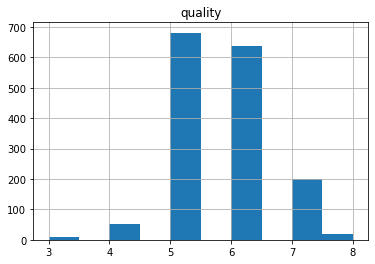

In [13]:
WineData.hist(column='quality')

* Normal wine quantity is much more than that of extremely good or bad wine. 

In [14]:
WineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* All float variables. No missing data

In [15]:
WineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* All variables are on different scales. 

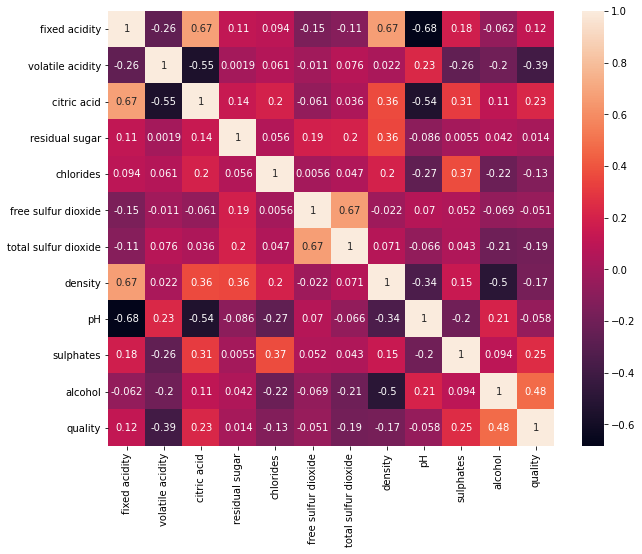

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(WineData.corr(),annot=True)

* Alcohol feature has highest (positive) correlation with quality target variable. 
* Other significantly correlating with the target variable is volatile acidity (negative correlation) followed by sulphates and citric acid. 

### 4. Feature Engineering

* Feature Scaling: Will handle it through pipeline while building the model

* Mapping target variable 'quality' to 3 values: Poor, Average, Good.

In [17]:
# WineData['quality2'] = ['Good' if x >= 7 else 'Bad' for x in WineData.quality]

def qual_remap(quality):
    if (quality >= 7):
        val = 'Good'
    elif (quality >= 5):
        val = 'Average'
    else:
        val = 'Poor'
    return val

WineData['quality2'] = WineData.quality.apply(qual_remap)

In [18]:
WineData.quality2.value_counts(normalize = True)

Average    0.824891
Good       0.135710
Poor       0.039400
Name: quality2, dtype: float64

### 6. Model Selection:
      a. knn
      b. Logistic Regression
      c. SVM
      d. SVM (linear kernel)
      e. Decision tree
      f. Random Forest 
      g. Gradient Boost


In [19]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline

In [40]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score,classification_report

In [21]:
X_trainval,X_test,y_trainval,y_test = train_test_split(WineData.drop(['quality','quality2'],axis=1),WineData.quality2,test_size = 0.10,random_state = 0)

In [22]:
X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,test_size = 0.1,random_state = 0)

In [23]:
# X_train.shape
# y_train.shape
# X_test.shape

In [46]:
# y_train.value_counts()
y_train.value_counts(normalize=True)

Average    0.815444
Good       0.145946
Poor       0.038610
Name: quality2, dtype: float64

In [43]:
models = [KNeighborsClassifier(),LogisticRegression(),SVC(),LinearSVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]

In [49]:
traincvscore = []
trainscore = []
valscore = []
modelnames = ['knn','lr','svm','svm(linear)','dt','rf','gb']
index = 0
for model in models:
    modelpipeline = Pipeline([('scaler', MinMaxScaler()),('model',model)])
    traincvscore.append(cross_val_score(modelpipeline,X_train,y_train,scoring='f1_macro'))
    modelpipeline.fit(X_train,y_train)
    trainscore.append(f1_score(y_pred=modelpipeline.predict(X_train),y_true=y_train,average='macro'))
    valscore.append(f1_score(y_pred=modelpipeline.predict(X_val),y_true=y_val,average='macro'))
    print("Model = ",modelnames[index])
    index += 1
    print("Training Data Classification Report")
    print(classification_report(y_true=y_train,y_pred=modelpipeline.predict(X_train)))
    print("Validation Data Classification Report")
    print(classification_report(y_true=y_val,y_pred=modelpipeline.predict(X_val)))
    print("\n\n")

Model =  knn
Training Data Classification Report
              precision    recall  f1-score   support

     Average       0.89      0.96      0.92      1056
        Good       0.73      0.56      0.63       189
        Poor       0.67      0.12      0.20        50

    accuracy                           0.87      1295
   macro avg       0.76      0.55      0.59      1295
weighted avg       0.86      0.87      0.85      1295

Validation Data Classification Report
              precision    recall  f1-score   support

     Average       0.92      0.96      0.94       126
        Good       0.58      0.58      0.58        12
        Poor       1.00      0.17      0.29         6

    accuracy                           0.90       144
   macro avg       0.84      0.57      0.60       144
weighted avg       0.90      0.90      0.88       144




Model =  lr
Training Data Classification Report
              precision    recall  f1-score   support

     Average       0.84      0.98      0.91  

/home/nirzaree/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nirzaree/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model =  svm
Training Data Classification Report
              precision    recall  f1-score   support

     Average       0.85      0.98      0.91      1056
        Good       0.75      0.31      0.44       189
        Poor       0.00      0.00      0.00        50

    accuracy                           0.85      1295
   macro avg       0.54      0.43      0.45      1295
weighted avg       0.80      0.85      0.81      1295

Validation Data Classification Report
              precision    recall  f1-score   support

     Average       0.90      0.99      0.94       126
        Good       0.80      0.33      0.47        12
        Poor       0.00      0.00      0.00         6

    accuracy                           0.90       144
   macro avg       0.57      0.44      0.47       144
weighted avg       0.85      0.90      0.86       144






/home/nirzaree/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nirzaree/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nirzaree/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model =  svm(linear)
Training Data Classification Report
              precision    recall  f1-score   support

     Average       0.84      0.98      0.91      1056
        Good       0.73      0.24      0.36       189
        Poor       0.00      0.00      0.00        50

    accuracy                           0.84      1295
   macro avg       0.52      0.41      0.42      1295
weighted avg       0.79      0.84      0.79      1295

Validation Data Classification Report
              precision    recall  f1-score   support

     Average       0.89      1.00      0.94       126
        Good       1.00      0.25      0.40        12
        Poor       0.00      0.00      0.00         6

    accuracy                           0.90       144
   macro avg       0.63      0.42      0.45       144
weighted avg       0.87      0.90      0.86       144




Model =  dt
Training Data Classification Report


/home/nirzaree/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Average       1.00      1.00      1.00      1056
        Good       1.00      1.00      1.00       189
        Poor       1.00      1.00      1.00        50

    accuracy                           1.00      1295
   macro avg       1.00      1.00      1.00      1295
weighted avg       1.00      1.00      1.00      1295

Validation Data Classification Report
              precision    recall  f1-score   support

     Average       0.92      0.92      0.92       126
        Good       0.62      0.67      0.64        12
        Poor       0.00      0.00      0.00         6

    accuracy                           0.86       144
   macro avg       0.51      0.53      0.52       144
weighted avg       0.86      0.86      0.86       144




Model =  rf
Training Data Classification Report
              precision    recall  f1-score   support

     Average       1.00      1.00      1.00      1056
        Good       1.00      1.00      1

/home/nirzaree/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model =  gb
Training Data Classification Report
              precision    recall  f1-score   support

     Average       0.95      1.00      0.98      1056
        Good       0.99      0.81      0.89       189
        Poor       1.00      0.72      0.84        50

    accuracy                           0.96      1295
   macro avg       0.98      0.84      0.90      1295
weighted avg       0.96      0.96      0.96      1295

Validation Data Classification Report
              precision    recall  f1-score   support

     Average       0.91      0.95      0.93       126
        Good       0.60      0.50      0.55        12
        Poor       0.00      0.00      0.00         6

    accuracy                           0.88       144
   macro avg       0.50      0.48      0.49       144
weighted avg       0.85      0.88      0.86       144






* The way the levels are defined (poor,medium,good) there is a high imbalance in the data, and most models are simply ignoring the least populated class (poor class). 
* Only knn has had some detections of all 3 classes, so we see if that can be improved further. 

#### Knn fine tuning 
* Todo

### 7. Validation

### 8. Test Data Prediction Results

In [50]:
# Training on all training data (train + val) and checking performance on test data
knnmodel = KNeighborsClassifier()
knnmodel.fit(X_trainval,y_trainval)

KNeighborsClassifier()

In [51]:
knnmodel.classes_

array(['Average', 'Good', 'Poor'], dtype=object)

In [53]:
knnmodel.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [54]:
knnmodel.score(X_test,y_test)

0.825

In [57]:
print(classification_report(y_true=y_trainval,y_pred=knnmodel.predict(X_trainval)))

              precision    recall  f1-score   support

     Average       0.89      0.97      0.93      1182
        Good       0.74      0.49      0.59       201
        Poor       0.86      0.11      0.19        56

    accuracy                           0.87      1439
   macro avg       0.83      0.52      0.57      1439
weighted avg       0.86      0.87      0.85      1439



In [56]:
print(classification_report(y_true=y_test,y_pred=knnmodel.predict(X_test)))

              precision    recall  f1-score   support

     Average       0.89      0.91      0.90       137
        Good       0.41      0.44      0.42        16
        Poor       0.00      0.00      0.00         7

    accuracy                           0.82       160
   macro avg       0.43      0.45      0.44       160
weighted avg       0.81      0.82      0.82       160



In [58]:
y_test.value_counts()

Average    137
Good        16
Poor         7
Name: quality2, dtype: int64

In [59]:
y_trainval.value_counts()

Average    1182
Good        201
Poor         56
Name: quality2, dtype: int64

* Since the test data partition is super small, and the instances of the **Poor** class are very less, the classifier has not been able to identify that class in the test data, however in the training dataset it did recall some samples of the **Poor** class. 

* Weighted metrics of the classifier look good because of the decent predictions in the majority class. 



### Regression 

In [ ]:
from skle